# Generate a RData file for ADBio

In this tutorial, we want to provide a basic guideline to transform your data matrix into RData file which is acceptable to create a new project in ADBio. Based on this simple tutorial, you can customize your clustering methods and data values (e.g., imputation and normalization).

## 1. Read a data file
Your matrix file contains the expression/abundance level of genes/proteins for each sample across columns. In this tutorial, we use a CSV formatted data file. 

### Column names
Column names should describe the unique identifications for samples. These ID must be identical to the sample ID containing in a meta-data file.

### Row names
Row names must be annotated to KEGG/UniProt/RefSeq IDs corresponding to genes/proteins. These IDs are associated to pathway analysis and visualization.

### Notes for naming
Names must be syntactically valid. A syntactically valid name consists of letters, numbers and the dot or underline characters and starts with a letter or the dot not followed by a number. (See check.names option in ‘read.csv’ function in R)
Please check out whether any column/row names are forcibly modified by R. For example, 'read.csv' function will replace a space and a dash(-) with a dot(.). 


In [ ]:
# you need to set the working directory where your data files are
setwd('repo/path/in/your/computer') # please replace the fake path with yours

In [3]:
data <- read.csv("example_dataset.csv", comment.char="#") # according to the file format (e.g. read.table for TSV)
rnames1 <- data[,1]                            # assign labels in column 1 to "rnames"
mat_data <- data.matrix(data[,2:ncol(data)])   # transform column 2-end into a matrix
rownames(mat_data) <- rnames1                  # assign row names

In [4]:
# See how it looks
head(mat_data)

,PID_00121,PID_00174,PID_00018,PID_00138,PID_00068,PID_00008,PID_00002,PID_00152,PID_00019,PID_00071,,PID_00047,PID_00061,PID_00135,PID_00020,PID_00049,PID_00092,PID_00166,PID_00023,PID_00107,PID_00010
NP_004068,0.081017224,-0.48112394,0.17148227,1.029274796,0.974543562,1.158397099,1.5,0.178390181,1.5,0.534595752,⋯,-1.017009461,-0.902903423,0.007125294,0.061543434,0.027999834,0.003529682,-0.807161912,-1.217207994,-0.637791584,-0.20518548
NP_005717,-0.572043179,-0.555441923,0.726880838,0.673126922,0.433186143,1.10465513,1.5,1.337676614,1.5,1.259458681,⋯,-0.677171308,-0.211168136,0.863182468,0.062422417,-0.142749763,-0.787378133,-1.123086234,-0.626620297,-1.264396809,-0.847299228
NP_001139730,-0.20512824,-0.73193839,1.00029989,0.56256434,1.05482352,1.22898431,-1.32596922,-0.93881524,1.5,1.5,⋯,-0.63567027,-0.68269557,0.81047888,0.3769607,-0.35951587,0.3339742,0.14570864,-0.9062525,-0.20144486,-0.88816513
NP_001035526,-1.466290961,0.159668526,0.767509246,-0.173556758,0.274281734,-1.100294814,0.250259377,1.5,0.694135412,-0.707405275,⋯,-1.039933005,-0.367006136,1.266747036,0.959532749,-0.513909706,-0.711311788,-0.853106058,-0.370472275,-0.399426697,-0.631602006
NP_079426,0.64491939,0.9970607,-0.20969094,0.05703623,0.79059197,-0.1642298,0.01734218,1.18182478,1.5,-0.43766149,⋯,0.52601372,-0.22418493,0.40409206,0.38811581,-1.41496386,-0.16784433,-0.12226089,-0.76471654,-1.39098814,-0.86676235
NP_055066,0.81613581,0.03589865,1.02789907,1.5,0.57532716,1.01662382,1.5,0.95866491,-0.61920806,0.92076554,⋯,-0.90334653,-1.39851361,0.05466963,1.08561931,-0.76360814,-0.57288907,-1.5,0.09759267,-1.4694761,-0.50650679


## 2. Clustering

A RData file for ADBio should contain an R object named ‘hc.out’, which has a list class having data matrix ('carpet') and clustering infomation ('rowDendrogram', 'colDendrogram'). For clustering, we use a <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering">hierarchical clustering</a> for this tutorial. However, if you prefer to the other clustering methods (e.g., k-means), you can use it so that you can customize the dendrograms containing the designated grouping instead of the current one. 

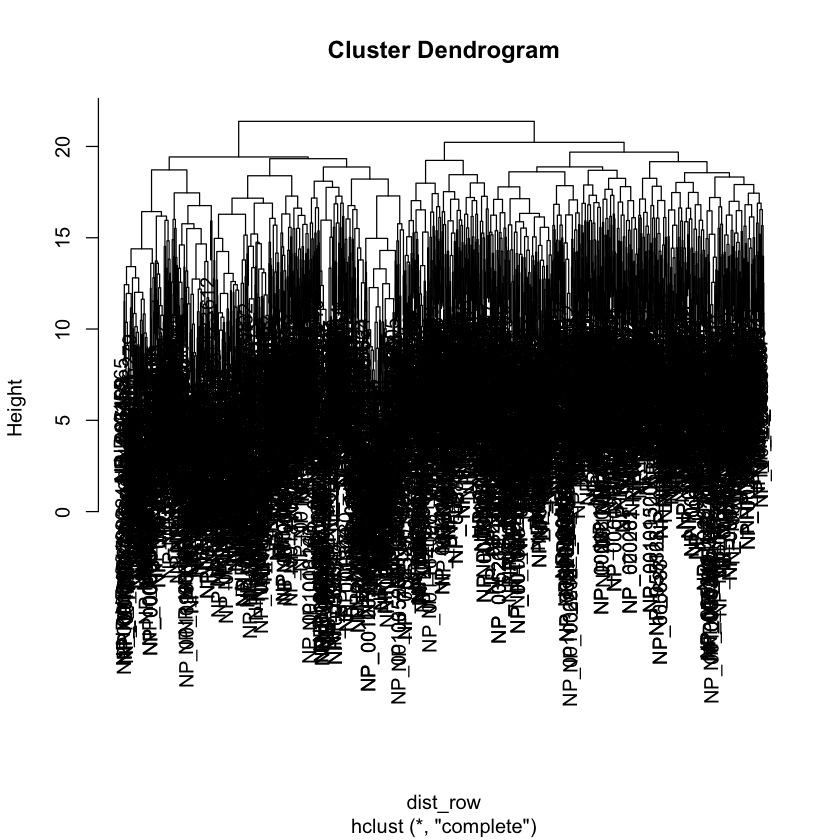

In [6]:
# For rows (i.e., genes and proteins). It will takes more time as the size increases.
dist_row <- dist(mat_data) # to calculate the distance between rows
## if you have NAs in your data matrix, you can adjust NA to maximum values
## dist_row[is.na(dist_row)] <- max(dist_row, na.rm = TRUE)
hc_row <- hclust(dist_row) # hierarchical clustering based on the distance
plot(hc_row)

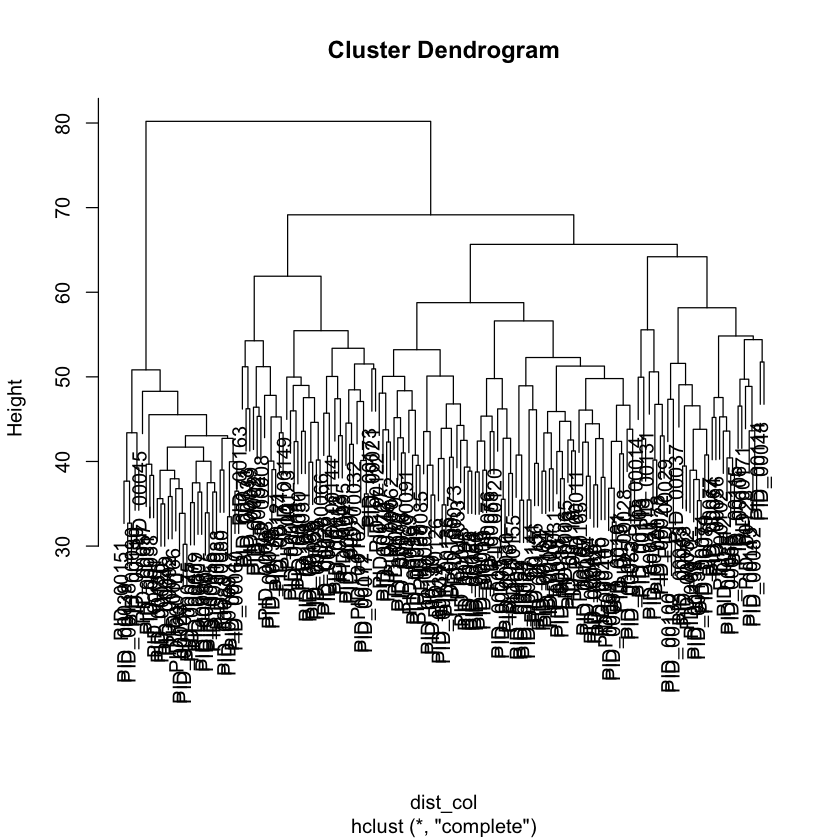

In [8]:
# For columns (i.e., samples)
dist_col <- dist(t(mat_data))
hc_col <- hclust(dist_col)
plot(hc_col)

### 2-1 Other clustering methods (e.g., k-means)

As mentioned above, you can use <a href="https://en.wikipedia.org/wiki/K-means_clustering">K-means</a>. However, to generate a dendrogram-like (tree-based structure) clustering output, you need a trick as below. Let's try to generate a cluster dendrogram for columns using k-means clustering.

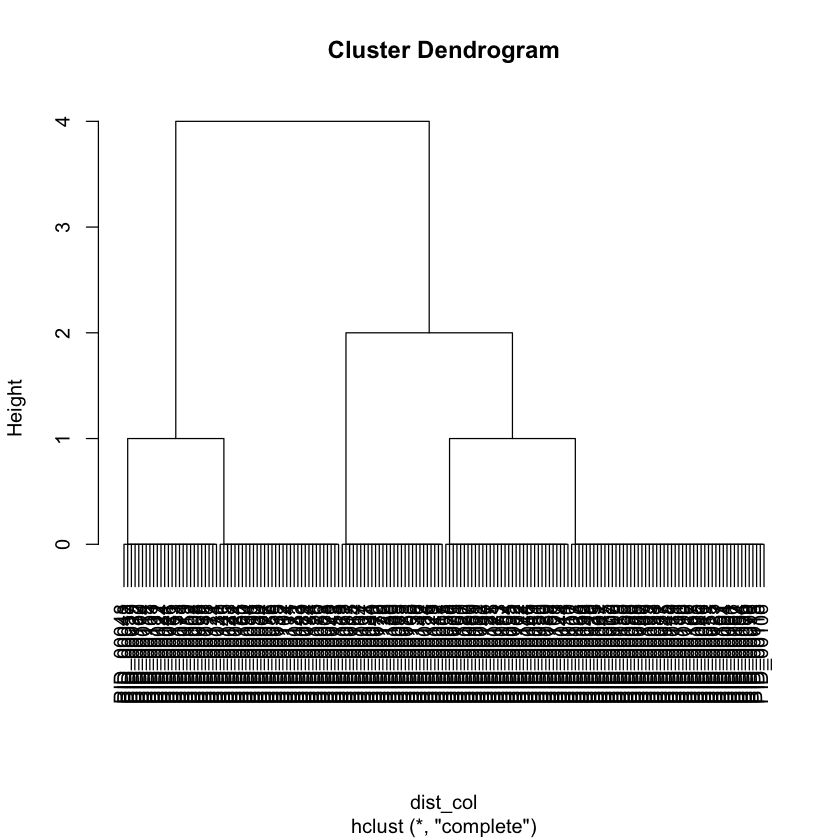

In [16]:
clusters <- kmeans(t(mat_data), centers = 5, iter.max = 100) # k-means clustering in R
# a trick to generate a cluster dendrogram
dist_col <- dist(clusters$cluster)
k_col <- hclust(dist_col)
plot(k_col)

As shown above, there are 5 different groups clustered by k-means method.

### 3. Save 'hc.out' with a RData format

In [12]:
hc.out <- list(rowDendrogram=hc_row, colDendrogram=hc_col, carpet=t(mat_data))
save(hc.out, file = 'data.RData')